In [1]:
import scipy.linalg
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Pre-Processing

## Data Importing

In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [2]:
path = 'goodreads_cleaned.csv'
#path = 'DATA/goodreads_cleaned.csv'

In [3]:
df = pd.read_csv(path, sep = ";")
df

,user_id,book_id,rating
0,8842281e1d1347389f2ab93d60773d4d,18245960,5
1,8842281e1d1347389f2ab93d60773d4d,16981,3
2,8842281e1d1347389f2ab93d60773d4d,28684704,3
3,8842281e1d1347389f2ab93d60773d4d,27161156,0
4,8842281e1d1347389f2ab93d60773d4d,25884323,4
...,...,...,...
899995,b9450d1c1f97f891c392b1105959b56e,11832081,3
899996,b9450d1c1f97f891c392b1105959b56e,16095092,3
899997,b9450d1c1f97f891c392b1105959b56e,8430896,4
899998,b9450d1c1f97f891c392b1105959b56e,12275680,4


## Data Exploration

In [4]:
df.user_id.value_counts().describe()

count    12188.000000
mean        73.843124
std        103.860677
min          1.000000
25%         14.000000
50%         37.000000
75%         92.000000
max       1815.000000
Name: user_id, dtype: float64

In [5]:
df.book_id.value_counts().describe()

count    25474.000000
mean        35.330141
std         67.222413
min          1.000000
25%         10.000000
50%         17.000000
75%         34.000000
max       1734.000000
Name: book_id, dtype: float64

## Data Cleaning

In [6]:
df['book_id_count'] = df.groupby('book_id')['book_id'].transform('count')
df['user_id_count'] = df.groupby('user_id')['user_id'].transform('count')

In [7]:
book_quantile = 0.95
user_quantile = 0.9

df = df.loc[(df.book_id_count >= df.book_id.value_counts().quantile(book_quantile)) & (df.user_id_count >= df.user_id.value_counts().quantile(user_quantile)),:]

In [8]:
df.shape

(114041, 5)

## Data Pivoting

In [9]:
df = pd.pivot_table(df, columns="book_id", index="user_id", values="rating")
df.head(10)

book_id,1,2,3,5,6,11,34,830,865,890,902,930,960,968,1103,1232,1617,1618,1622,1845,1885,1934,1953,2156,2165,2187,2493,2526,2623,2657,2744,2839,2998,3431,3473,3636,3682,4214,4381,4407,4588,4671,4929,4981,5043,5107,5129,5297,5364,5470,...,28374007,28449207,28458598,28477789,28588345,28597587,28678119,28686840,28763485,28862528,28954189,28962906,29008738,29056083,29069989,29236299,29237211,29283884,29367958,29385546,29396738,29519514,29519517,29541818,29610595,29772863,29780253,29868610,29939230,29939390,29991719,30075802,30095464,30117284,30226723,30253864,30256248,30312891,30555488,30653853,30724132,31140847,31450852,31451174,31931941,32075662,32075671,32571395,33232571,35247769
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00238d8a4c276c47f5d5e242f54a8f28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
002a023d3de233b4bd3ec4fc3e9c581a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,4.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
006f552534b15a7358a125f7505e0eea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
009235f414f42cfd0f76282f6aefe6c1,NaN,NaN,5.0,5.0,4.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN
009a47e49c0dc6e84d1c5e0eb4cdf7f6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00b5b129cc3cfa6511418cce1cec54ab,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,4.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0,4.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01001347e5bab7241212a0a6910260f8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0102db8db2097cd4482ebc20b7b2d5be,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,N

In [10]:
df.shape

(1218, 1276)

## Convert to an array to work with the matrix

In [11]:
df.reset_index(drop=True)
df

book_id,1,2,3,5,6,11,34,830,865,890,902,930,960,968,1103,1232,1617,1618,1622,1845,1885,1934,1953,2156,2165,2187,2493,2526,2623,2657,2744,2839,2998,3431,3473,3636,3682,4214,4381,4407,4588,4671,4929,4981,5043,5107,5129,5297,5364,5470,...,28374007,28449207,28458598,28477789,28588345,28597587,28678119,28686840,28763485,28862528,28954189,28962906,29008738,29056083,29069989,29236299,29237211,29283884,29367958,29385546,29396738,29519514,29519517,29541818,29610595,29772863,29780253,29868610,29939230,29939390,29991719,30075802,30095464,30117284,30226723,30253864,30256248,30312891,30555488,30653853,30724132,31140847,31450852,31451174,31931941,32075662,32075671,32571395,33232571,35247769
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00238d8a4c276c47f5d5e242f54a8f28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
002a023d3de233b4bd3ec4fc3e9c581a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,4.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
006f552534b15a7358a125f7505e0eea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
009235f414f42cfd0f76282f6aefe6c1,NaN,NaN,5.0,5.0,4.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN
009a47e49c0dc6e84d1c5e0eb4cdf7f6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffbf525357e96614c4b9ee613aa95caa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ffd6c966d94d3d06c8cc4480536082b4,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [113]:
data_matrix = df.to_numpy(na_value=np.nan)
print(data_matrix)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan  5. nan ...  3. nan nan]]


In [114]:
# Check how to get the index of not empty values
idx = np.argwhere(~np.isnan(data_matrix))
print(idx)

[[   0   65]
 [   0   79]
 [   0  204]
 ...
 [1217 1223]
 [1217 1236]
 [1217 1273]]


In [14]:
np.unique(data_matrix[idx[:,0], idx[:,1]])

array([0., 1., 2., 3., 4., 5.])

# Frank-Wolfe - standard algorithm

- Should we feed $\delta$ to the FW algorithm or should it be defined based on the dimensions of the data?
- Which is the correct objective function?
- Initialize with random matrix of integers from 1 to 5 or with zeros matrix?

In [1]:
from scipy import sparse
from scipy import stats

In [121]:
def FW_objective_function(diff_vec):
    return 0.5*(np.power(diff_vec,2).sum())
    #return 0.5 * np.linalg.norm(diff_vec, 2)**2

def FrankWolfe(X, objective_function, delta, printing_res = True, Z_init = None, max_iter = 150, patience = 1e-3):
    '''
    :param X: sparse matrix with ratings and 'empty values', rows - users, columns - books.
    :param objective_function: objective function that we would like to minimize with FW
    :param Z_init: In case we want to initialize Z with a known matrix, if not given Z_init will be a zeros matrix
    :param max_iter: max number of iterations for the method
    :param patience: once reached this tolerance provide the result
    :return: Z: matrix of predicted ratings - it should be like X but with no 'empty values'
            accuracy: difference between original values (X) and predicted ones (Z)
    '''
    res_list = []

    # Get X indexes for not empty values
    idx_ratings = np.argwhere(X != 0)
    #idx_ratings = np.argwhere(~np.isnan(X))
    idx_rows = idx_ratings[:,0]
    idx_cols = idx_ratings[:,1]

    # Initialize Z -- think about a good init
    if Z_init is not None:
        Z = Z_init
    else:
        #Z = np.random.randint(1, 6, size=X.shape)
        #Z = Z.astype(float)
        Z = np.random.uniform(low = 0.01, high = 1, size = X.shape)

    # Create vectors with the not empty features of the sparse matrix
    X_rated = X[idx_rows, idx_cols]
    Z_rated = Z[idx_rows, idx_cols]
    diff_vec = Z_rated - X_rated
    flat = np.array(diff_vec)[0]

    # choose an appropriate delta
    delta = delta

    diff_err = patience + 1
    err = objective_function(diff_vec)
    it = 0
    while (diff_err > patience) and (it < max_iter):

        # Gradient
        grad = sparse.csr_matrix((flat, (idx_rows, idx_cols)))

        # SVD
        u_max, s_max, v_max = sparse.linalg.svds(grad, k = 1, which='LM')   # Compute k = 1 singular values, starting from the largest (which = 'LM')

        # Update
        Zk_tilde = -delta*np.outer(u_max,v_max)     # Zk_tilde in the theory
        #Zk_tilde = np.random.uniform(size = Z.shape)
        #alpha - as studied in class
        alpha_k = 2/(it+2)
        Z = (1-alpha_k)*Z + alpha_k*Zk_tilde
        # Error
        diff_vec = Z[idx_rows, idx_cols] - X_rated
        flat = np.array(diff_vec)[0]

        new_err = objective_function(diff_vec)

        # Improvement at this iteration
        diff_err = np.abs(err - new_err)
        err = new_err

        if printing_res == True:
            if it == 1 or it % 10 == 0:
                print('Iteration:', it, 'Err:', err, 'Diff err:', diff_err, 'Z rank: ',np.linalg.matrix_rank(Z), 'Z_tilde rank: ', sparse.csgraph.structural_rank(Zk_tilde) )

        # Count iteration
        it += 1

        res_list.append(err)
        
    return Z, Zk_tilde, err, res_list

We build a smaller matrix for testing the FW alg, then we will apply it to our data

In [122]:

import numpy as np
import scipy.sparse
  
n = 400
m = 200
r = 10
rho = 0.10
SNR = 5
delta = 3.75



# taking data
U = scipy.sparse.random(m, r, density=0.1, format='csr', data_rvs=None)
V = scipy.sparse.random(r, n, density=0.1, format='csr', data_rvs=None)
E = scipy.sparse.random(m, n, density=0.1, format='csr', data_rvs=None)



VT = V.transpose(copy=True)

UVT = U*V
#print(UVT. shape)

w1 = 1/(scipy.sparse.linalg.norm(UVT, ord='fro'))

w2 = 1/(SNR*scipy.sparse.linalg.norm(E, ord='fro'))


#Finally observed data matrix is: 

X = w1*UVT + w2*E


idx_ratings = np.argwhere(X != 0)
    #idx_ratings = np.argwhere(~np.isnan(X))
idx_rows = idx_ratings[:,0]
idx_cols = idx_ratings[:,1]


Z = np.random.uniform(low = 0.01, high = 1, size = X.shape)

    # Create vectors with the not empty features of the sparse matrix
X_rated = X[idx_rows, idx_cols]
Z_rated = Z[idx_rows, idx_cols]
diff_vec = Z_rated - X_rated


print(diff_vec.shape)
flat = np.array(diff_vec)[0]
print(flat.shape)
print(idx_rows.shape)
print(idx_cols.shape)

print(flat)
print(np.linalg.matrix_rank(X))

print(X.max(), X.min())



grad = sparse.csr_matrix((flat, (idx_rows, idx_cols)))



(1, 14991)
(14991,)
(14991,)
(14991,)
[0.8973433  0.73941052 0.24150923 ... 0.05859965 0.22012866 0.13195852]
1
0.05181508827876936 0.0


In [131]:
pred_ratings, loss, third, ff = FrankWolfe(X, FW_objective_function, delta = 10, max_iter=25, patience=1e-7)

<ipython-input-121-2fdc990645dd>:69: SparseEfficiencyWarning: Input matrix should be in CSC, CSR, or COO matrix format
  print('Iteration:', it, 'Err:', err, 'Diff err:', diff_err, 'Z rank: ',np.linalg.matrix_rank(Z), 'Z_tilde rank: ', sparse.csgraph.structural_rank(Zk_tilde) )


Iteration: 0 Err: 24.14270276266739 Diff err: 2457.1593495343336 Z rank:  1 Z_tilde rank:  200
Iteration: 1 Err: 4.318127388654205 Diff err: 19.824575374013186 Z rank:  2 Z_tilde rank:  200
Iteration: 10 Err: 0.8397852139621323 Diff err: 0.13004422496019485 Z rank:  11 Z_tilde rank:  200
Iteration: 20 Err: 0.3422568532434619 Diff err: 0.015423320089266723 Z rank:  21 Z_tilde rank:  200


In [240]:
#pred_ratings*5

In [241]:
# idx_ratings = np.argwhere(~np.isnan(X_test))
# idx_rows = idx_ratings[:,0]
# idx_cols = idx_ratings[:,1]
# pred_ratings[idx_rows,idx_cols]*5

#### Our data prediction

In [242]:
new_data = np.nan_to_num(data_matrix, 0)

In [135]:
pred_ratings, update_Z, loss, res_listFW = FrankWolfe(new_data, FW_objective_function, delta = 32000, max_iter=75, patience=1e-5)

<ipython-input-121-2fdc990645dd>:69: SparseEfficiencyWarning: Input matrix should be in CSC, CSR, or COO matrix format
  print('Iteration:', it, 'Err:', err, 'Diff err:', diff_err, 'Z rank: ',np.linalg.matrix_rank(Z), 'Z_tilde rank: ', sparse.csgraph.structural_rank(Zk_tilde) )


Iteration: 0 Err: 188924563.30078256 Diff err: 188922103.1708303 Z rank:  1 Z_tilde rank:  200
Iteration: 1 Err: 56813308.41630982 Diff err: 132111254.88447274 Z rank:  2 Z_tilde rank:  200
Iteration: 10 Err: 3996335.788460893 Diff err: 511466.27117507486 Z rank:  11 Z_tilde rank:  200
Iteration: 20 Err: 1126363.7186133093 Diff err: 73099.30556536466 Z rank:  19 Z_tilde rank:  200
Iteration: 30 Err: 521907.08582766633 Diff err: 22576.863974368433 Z rank:  21 Z_tilde rank:  200
Iteration: 40 Err: 299876.0032303731 Diff err: 9684.150091977965 Z rank:  22 Z_tilde rank:  200
Iteration: 50 Err: 194412.8899755189 Diff err: 4984.583104940772 Z rank:  22 Z_tilde rank:  200
Iteration: 60 Err: 136185.8183304586 Diff err: 2880.3143711381417 Z rank:  23 Z_tilde rank:  200
Iteration: 70 Err: 100681.77564456024 Diff err: 1802.3915959058795 Z rank:  23 Z_tilde rank:  200


In [125]:
from matplotlib.pyplot import plot

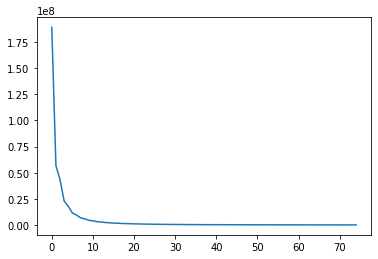

In [136]:
plot(res_listFW)



In [220]:
pred_reg = (pred_ratings*6)-1

print(np.linalg.matrix_rank(pred_reg, tol = -10))
print(pred_reg)

1218
[[186.84049249 191.51075278 161.30923878 ... 231.81278875 218.73175139
  223.229082  ]
 [188.75780771 193.47574377 162.96590817 ... 234.18920809 220.97463801
  225.51787651]
 [209.97759916 215.22318453 181.30101461 ... 260.49011219 245.79767516
  250.84899698]
 ...
 [178.97089452 183.44547087 154.50945294 ... 222.05881144 209.52585602
  213.8347586 ]
 [192.2248474  197.02898913 165.96166956 ... 238.48637445 225.03035193
  229.65660187]
 [177.67842658 182.12086987 153.39264576 ... 220.45692064 208.01396828
  212.29192698]]


# Frank-Wolfe In-face

In [26]:
from numpy import linalg as LA
import time 

time_out = time.process_time() + 5  

In [27]:
def FW_objective_function(diff_vec):
    return 0.5*(np.power(diff_vec,2).sum())
    #return 0.5 * np.linalg.norm(diff_vec, 2)**2
    
def alpha_binary_search(Zk, Dk, delta, max_value = 1, min_value = 0, tol = 0.3):
        
    #Inizialization
    
    best_alpha = (max_value - min_value) / 2
    
    testing_matrix = Zk + best_alpha * Dk

    sentinel = False

    while time.process_time() <= time_out:
      
      testing_mat_nuclear_norm = LA.norm(testing_matrix, ord = 'nuc')

      sentinel = True
    
    #Binary Search

    if sentinel == True:
    
      while testing_mat_nuclear_norm <= delta and (max_value - min_value) >= tol and time.process_time() <= time_out:
          
          min_value = best_alpha
          
          best_alpha = (max_value - min_value) / 2

          testing_matrix = Zk + best_alpha * Dk
      
          testing_mat_nuclear_norm = LA.norm(testing_matrix, ord = 'nuc')     
        
    return best_alpha

def FW_inface(X, objective_function, delta, gamma1 = 0, gamma2 = 1, THRES = 0.001, Z_init = None, max_iter=150, patience=1e-3, printing = True):
    '''
    :param X: sparse matrix with ratings and 'empty values', rows - users, columns - books.
    :param objective_function: objective function that we would like to minimize with FW.
    :param Z_init: In case we want to initialize Z with a known matrix, if not given Z_init will be a zeros matrix.
    :param max_iter: max number of iterations for the method.
    :param patience: once reached this tolerance provide the result.
    :return: Z: matrix of predicted ratings - it should be like X but with no 'empty values'
            loss: difference between original values (X) and predicted ones (Z).
    '''

    # Get X indexes for not empty values
    idx_ratings = np.argwhere(X != 0)
    #idx_ratings = np.argwhere(~np.isnan(X))
    idx_rows = idx_ratings[:,0]
    idx_cols = idx_ratings[:,1]

    # choose an appropriate delta

    # Initialize Z_{-1}
    if Z_init is not None:
        Z = Z_init
    else:
        Z = np.zeros(X.shape)

    # Create vectors with the not empty features of the sparse matrix
    X_rated = X[idx_rows, idx_cols]
    Z_rated = Z[idx_rows, idx_cols]
    diff_vec = Z_rated - X_rated

    # Initial gradient and Z0
    grad = sparse.csr_matrix((diff_vec, (idx_rows, idx_cols)))
    u_max, s_max, v_max = sparse.linalg.svds(grad, k = 1, which='LM')
    Z = -delta*np.outer(u_max,v_max)
    Z_rated = Z[idx_rows, idx_cols]

    # Initialize lower bound on the optimal objective function (f*)
    diff_vec = Z_rated - X_rated
    new_low_bound = np.max((objective_function(diff_vec) + np.multiply(diff_vec,Z_rated)),0)

    # Set L and D constants and gamma1, gamma2 constraints
    L = 1
    D = 2*delta

    # Compute first iteration thin SVD
    grad = sparse.csr_matrix((diff_vec, (idx_rows, idx_cols)))
    r_grad = sparse.csgraph.structural_rank(grad)   # Compute rank of the gradient sparse matrix to find thin SVD size
    print(r_grad, grad.shape)
    # U_thin, D_thin, Vh_thin = sparse.linalg.svds(grad, k = r_grad, which = 'LM')   # Compute k = rank singular values # replaced r_grad with 1
    # U_app, D_app, Vh_app = sparse.linalg.svds(grad, k = 1, which='SM')
    U_thin, D_thin, Vh_thin = LA.svd(grad.toarray())
    D_thin = D_thin.T

    # Additional needed parameters
    diff_objective = patience + 1
    objective = objective_function(diff_vec)
    it = 0
    while (diff_objective > patience) and (it < max_iter):

        # Lower bound update
        low_bound = new_low_bound

        # In-face direction with the away step strategy: two calculations depending of where Z lies within the feasible set
        if D_thin.sum() == delta: # Z in border (sum of singular values == radious of feasible set)
            G = 0.5(Vh_thin.dot(grad.T.dot(U_thin)) + U_thin.T.dot(grad.dot(Vh_thin.T)))
            u = sparse.linalg.eigs(G, k = 1, which = 'SM')#unitary eigenvector corresponding to smallest eigenvalue of G
            M = np.outer(u,u)
            update_Z = delta*U_thin.dot(M.dot(Vh_thin))  # Zk tilde, right?
            update_direction = Z-update_Z
            alpha_B = scipy.linalg.inv(delta*u.T.dot(scipy.linalg.inv(update_direction).dot(u))-1)
            
        else: #inside

            idx_max_s = np.argmax(D_thin)
            update_Z = delta*np.outer(U_thin[idx_max_s,:],Vh_thin[idx_max_s,:])
            update_direction = Z-update_Z
            #BINARY SEARCH (xd)
            alpha_B = alpha_binary_search(Z, # This one should be Zk, not Zk tilde... have I chose the correct variable? 
                                          D_thin, # This one should be the direction matrix
                                          delta) 

        nuclear_norm = D_thin.sum()
        U = nuclear_norm*D_thin # standardize the simplex
        r = D_thin.shape[0]     # added the index so it could be compared to a number
        no_obs = idx_rows.shape[0]
        # THRES = 0.001
        
        if abs(delta - nuclear_norm) < THRES and r > 1:
            Z_B = Z + alpha_B*update_direction
            diff_vec_B = Z_B[idx_rows, idx_cols] - X_rated
            beta = 0.5 # FIND A GOOD VALUE -- a binary search is also suggested by the paper xdd
            Z_A = Z + beta*update_direction
            diff_vec_A = Z_A[idx_rows, idx_cols] - X_rated
            
            if 1/(objective_function(diff_vec_B)-low_bound) >= (1/(objective-low_bound)+gamma1/(2*L*D**2)):
              # 1. Move to a lower dimensional face
              print('Went to a lower-dimensional face')
              Z = Z_B
              
              #SHOULDN'T THIS BE THE SAME AS THE DENOMINATOR IN THE INEQUALITY CHECK? SEE RED CIRCLES IN IMAGE

            else:
                beta = 0.5 # FIND A GOOD VALUE -- a binary search is also suggested by the paper xdd
                Z_A = Z + beta*update_direction
                diff_vec_A = Z_A[idx_rows, idx_cols] - X_rated


            if 1/(objective_function(diff_vec_A)-low_bound) >= (1/(objective-low_bound)+gamma2/(2*L*D**2)):
                # 2. Stay in the current face
                print('Stay in the current face')
                Z = Z_A
                #SHOULDN'T THIS BE THE SAME AS THE DENOMINATOR IN THE INEQUALITY CHECK? SEE RED CIRCLES IN IMAGE

        else:

            # 3. Do a regular FW step and update the lower bound
            print('Do regular FW step')
            #Zk update
            idx_max_s = np.argmax(D_thin)
            update_Z = -delta*np.outer(U_thin[idx_max_s,:],Vh_thin[:,idx_max_s]) # Am i selecting right the vectors??
            alpha_k = 2/(it+2)
            Z = (1-alpha_k)*Z + alpha_k*update_Z

            # Lower bound update
            direction_vec = update_Z.flatten() - Z.flatten()

            grad = grad.toarray() # this method converts the sparse matrix into a numpy array!

            wolfe_gap = grad.T.flatten() * direction_vec #added the flatten otherwise you can't do the operation
            B_w = objective + wolfe_gap.sum()
            #new_low_bound = np.max(low_bound, B_w)   # gave problems during the execution: wanted both numbers as integers??

            ''' TRIED THIS INSTEAD'''
            if low_bound >= B_w:
              new_low_bound = low_bound
            else:
              new_low_bound = B_w
            ''' '''

        # Loss
        diff_vec = Z[idx_rows, idx_cols] - X_rated
        new_objective = objective_function(diff_vec)

        # Improvement at this iteration
        diff_objective = np.abs(objective - new_objective)
        objective = new_objective

        # Gradient
        grad = sparse.csr_matrix((diff_vec, (idx_rows, idx_cols)))

        # Thin SVD
        r_grad = sparse.csgraph.structural_rank(grad)   # Compute rank of the gradient sparse matrix to find thin SVD size
        #U_thin, D_thin, Vh_thin = sparse.linalg.svds(grad, k = 1, which='LM')   # Compute k = rank singular values # replaced r_grad with 1
        U_thin, D_thin, Vh_thin = LA.svd(grad.toarray())
        D_thin = D_thin.T

        # Count iteration
        it += 1

        if printing == True:
          if it % 1 == 0 or it == 1:
            print('Iteration:', it, 'f(Z_k):', objective, 'f(Z_{k-1}) -f(Z_k):', diff_objective)

    return Z, objective, it

In [28]:
def FW_objective_function(diff_vec):
    return 0.5*(np.power(diff_vec,2).sum())
    #return 0.5 * np.linalg.norm(diff_vec, 2)**2

In [29]:
def alpha_binary_search(Zk, Dk, delta, max_value = 1, min_value = 0, tol = 0.3):
        
    #Inizialization
    
    best_alpha = (max_value - min_value) / 2
    
    testing_matrix = Zk + best_alpha * Dk

    sentinel = False

    while time.process_time() <= time_out:
      
      testing_mat_nuclear_norm = LA.norm(testing_matrix, ord = 'nuc')

      sentinel = True
    
    #Binary Search

    if sentinel == True:
    
      while testing_mat_nuclear_norm <= delta and (max_value - min_value) >= tol and time.process_time() <= time_out:
          
          min_value = best_alpha
          
          best_alpha = (max_value - min_value) / 2

          testing_matrix = Zk + best_alpha * Dk
      
          testing_mat_nuclear_norm = LA.norm(testing_matrix, ord = 'nuc')     
        
    return best_alpha

In [30]:
def FW_inface(X, objective_function, delta, gamma1 = 0, gamma2 = 1, THRES = 0.001, Z_init = None, max_iter=150, patience=1e-3, printing = True):
    '''
    :param X: sparse matrix with ratings and 'empty values', rows - users, columns - books.
    :param objective_function: objective function that we would like to minimize with FW.
    :param Z_init: In case we want to initialize Z with a known matrix, if not given Z_init will be a zeros matrix.
    :param max_iter: max number of iterations for the method.
    :param patience: once reached this tolerance provide the result.
    :return: Z: matrix of predicted ratings - it should be like X but with no 'empty values'
            loss: difference between original values (X) and predicted ones (Z).
    '''

    res_list = []

    # Get X indexes for not empty values
    idx_ratings = np.argwhere(X != 0)
    #idx_ratings = np.argwhere(~np.isnan(X))
    idx_rows = idx_ratings[:,0]
    idx_cols = idx_ratings[:,1]

    # choose an appropriate delta

    # Initialize Z_{-1}
    if Z_init is not None:
        Z = Z_init
    else:
        Z = np.zeros(X.shape)

    # Create vectors with the not empty features of the sparse matrix
    X_rated = X[idx_rows, idx_cols]
    Z_rated = Z[idx_rows, idx_cols]
    diff_vec = Z_rated - X_rated

    # Initial gradient and Z0
    grad = sparse.csr_matrix((diff_vec, (idx_rows, idx_cols)))
    u_max, s_max, v_max = sparse.linalg.svds(grad, k = 1, which='LM')
    Zk = -delta*np.outer(u_max,v_max)
    Z_rated = Zk[idx_rows, idx_cols]

    # Initialize lower bound on the optimal objective function (f*)
    diff_vec = Z_rated - X_rated
    #new_low_bound = np.max((objective_function(diff_vec) + np.multiply(diff_vec,Z_rated)), 0)
    new_low_bound = 0

    # Set L and D constants
    L = 1
    D = 2*delta

    # Compute first iteration thin SVD
    #grad = sparse.csr_matrix((diff_vec, (idx_rows, idx_cols)))
    r_grad = sparse.csgraph.structural_rank(diff_vec)   # Compute rank of the gradient sparse matrix to find thin SVD size
    # U_thin, D_thin, Vh_thin = sparse.linalg.svds(grad, k = r_grad, which = 'LM')   # Compute k = rank singular values # replaced r_grad with 1
    # U_app, D_app, Vh_app = sparse.linalg.svds(grad, k = 1, which='SM')
    U_thin, D_thin, Vh_thin = LA.svd(grad.toarray())
    D_thin = D_thin.T

    # Additional needed parameters
    diff_objective = patience + 1
    objective = objective_function(diff_vec)
    it = 0

    while (diff_objective > patience) and (it < max_iter):

        # Lower bound update
        low_bound = new_low_bound

        # In-face direction with the away step strategy: two calculations depending of where Z lies within the feasible set
        if D_thin.sum() == delta: # Z in border (sum of singular values == radious of feasible set)
            G = 0.5(Vh_thin.dot(grad.T.dot(U_thin)) + U_thin.T.dot(grad.dot(Vh_thin.T)))
            u = sparse.linalg.eigs(G, k = 1, which = 'SM')#unitary eigenvector corresponding to smallest eigenvalue of G
            M = np.outer(u,u)
            Zk_tilde = delta*U_thin.dot(M.dot(Vh_thin))
            Dk = Zk - Zk_tilde
            alpha_B = scipy.linalg.inv(delta*u.T.dot(scipy.linalg.inv(Dk).dot(u))-1)
            
        else: #inside

            idx_max_s = np.argmax(D_thin)
            Zk_tilde = delta*np.outer(U_thin[idx_max_s,:],Vh_thin[idx_max_s,:])
            Dk = Zk - Zk_tilde
            #BINARY SEARCH (xd)
            alpha_B = alpha_binary_search(Zk, # This one should be Zk, not Zk tilde... have I chose the correct variable? 
                                          Dk, # This one should be the direction matrix
                                          delta) 

        nuclear_norm = D_thin.sum()
        U = nuclear_norm * D_thin # standardize the simplex
        r = D_thin.shape[0]     # added the index so it could be compared to a number
        no_obs = idx_rows.shape[0]
        # THRES = 0.001

        #print('Nuclear Norm:  ' + str(nuclear_norm))
        
        #if abs(delta - nuclear_norm) < THRES and r > 1:
        Z_B = Zk + alpha_B * Dk
        diff_vec_B = Z_B[idx_rows, idx_cols] - X_rated
        beta = alpha_B / 5 # FIND A GOOD VALUE -- a binary search is also suggested by the paper xdd

        Z_A = Zk + beta * Dk
        diff_vec_A = Z_A[idx_rows, idx_cols] - X_rated

        '''

        print('First Condition: ' + str(1/(objective_function(diff_vec_B)-low_bound)) + '   vs   Second Condition: ' + str(1/(objective-low_bound)+gamma1/(2*L*D**2)))
        print('Elif:')
        print('First Condition: ' + str(1/(objective_function(diff_vec_A)-low_bound)) + '   vs   Second Condition: ' + str(1/(objective-low_bound)+gamma2/(2*L*D**2)))

        print('Low Bound:' + str(low_bound))
        print('1 / (Objective - Low Bound): ' + str(1/(objective-low_bound)))

        '''

        # if abs(delta - nuclear_norm) < THRES and r > 1:

        if 1/(objective_function(diff_vec_B)-low_bound) >= (1/(objective-low_bound)+gamma1/(2*L*D**2)):

          # 1. Move to a lower dimensional face
          print('Went to a lower-dimensional face')
          Zk = Z_B

        elif 1/(objective_function(diff_vec_A)-low_bound) >= (1/(objective-low_bound)+gamma2/(2*L*D**2)):

          # 2. Stay in the current face
          print('Stay in the current face')
          Zk = Z_A

          # else:
          #   raise 'Error'

        else:

          # 3. Do a regular FW step and update the lower bound
          print('Do regular FW step')
          
          #Zk update
          idx_max_s = np.argmax(D_thin)
          Zk_tilde = -delta*np.outer(U_thin[idx_max_s,:],Vh_thin[:,idx_max_s]) # Am i selecting right the vectors??
          alpha_k = 2/(it+2)
          Zk = (1-alpha_k)*Z + alpha_k * Zk_tilde 

          # Lower bound update
          direction_vec = Zk_tilde.flatten() - Zk.flatten()

          grad = grad.toarray() # this method converts the sparse matrix into a numpy array!

          wolfe_gap = grad.T.flatten() * direction_vec #added the flatten otherwise you can't do the operation
          B_w = objective + wolfe_gap.sum()
          #new_low_bound = np.max(low_bound, B_w)   # gave problems during the execution: wanted both numbers as integers??

          ''' TRIED THIS INSTEAD '''

          if low_bound >= B_w:
            new_low_bound = low_bound
          else:
            new_low_bound = B_w
          ''' '''

        # Loss
        diff_vec = Zk[idx_rows, idx_cols] - X_rated
        new_objective = objective_function(diff_vec)

        # Improvement at this iteration
        diff_objective = np.abs(objective - new_objective)
        objective = new_objective

        # Gradient
        grad = sparse.csr_matrix((diff_vec, (idx_rows, idx_cols)))

        # Thin SVD
        r_grad = sparse.csgraph.structural_rank(grad)   # Compute rank of the gradient sparse matrix to find thin SVD size
        #U_thin, D_thin, Vh_thin = sparse.linalg.svds(grad, k = 1, which='LM')   # Compute k = rank singular values # replaced r_grad with 1
        U_thin, D_thin, Vh_thin = LA.svd(grad.toarray())
        D_thin = D_thin.T

        # Count iteration
        it += 1

        res_list.append(objective)

        if printing == True:
          if it % 5 == 0 or it == 1:
            print('Iteration: ', it, 'f(Z_k): ', objective, 'f(Z_{k-1}) - f(Z_k): ', diff_objective, ' Rank of Zk: ', sparse.csgraph.structural_rank(Zk))
            print(''' ''')

    return Z, objective, it, res_list

# Tuned Model



In [31]:
pred_ratings, loss, it, res_listInFW = FW_inface(new_data, FW_objective_function, gamma1 = 0, gamma2 = 1, delta = 500, THRES = 10000, max_iter = 100, patience = 0.0001, printing = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: SparseEfficiencyWarning: Input matrix should be in CSC, CSR, or COO matrix format


Went to a lower-dimensional face


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:181: SparseEfficiencyWarning: Input matrix should be in CSC, CSR, or COO matrix format


Iteration:  1 f(Z_k):  609443.3405929218 f(Z_{k-1}) - f(Z_k):  77481.73682131304  Rank of Zk:  1218
 
Went to a lower-dimensional face
Went to a lower-dimensional face
Do regular FW step
Do regular FW step
Iteration:  5 f(Z_k):  899067.4975256249 f(Z_{k-1}) - f(Z_k):  254.53762226132676  Rank of Zk:  1218
 
Do regular FW step
Went to a lower-dimensional face
Stay in the current face
Do regular FW step
Went to a lower-dimensional face
Iteration:  10 f(Z_k):  901610.9337171225 f(Z_{k-1}) - f(Z_k):  3227.6742062630365  Rank of Zk:  1218
 
Do regular FW step
Went to a lower-dimensional face
Do regular FW step
Stay in the current face
Went to a lower-dimensional face
Iteration:  15 f(Z_k):  903922.3702006602 f(Z_{k-1}) - f(Z_k):  6161.866981818457  Rank of Zk:  1218
 
Do regular FW step
Stay in the current face
Stay in the current face
Stay in the current face
Went to a lower-dimensional face
Iteration:  20 f(Z_k):  903300.3752879112 f(Z_{k-1}) - f(Z_k):  5993.132773655001  Rank of Zk:  121

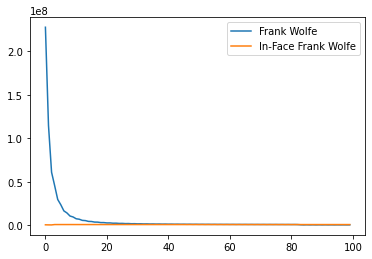

In [ ]:
import matplotlib.pyplot as plt

plt.plot(res_listFW, label = 'Frank Wolfe')
plt.plot(res_listInFW, label = 'In-Face Frank Wolfe')
plt.legend()
plt.show()

# Grid Searching

##Delta

In [ ]:
deltas = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]

for delta in deltas:
  pred_ratings, loss, it = FW_inface(new_data, FW_objective_function, delta = delta, max_iter=201, patience = 0.01, printing = False)
  print('Delta: ' + str(delta) + '    ------     Final Loss: ' + str(loss) + '   at iteration ' + str(it))

Delta: 0.001    ------     Final Loss: 1995299.6906607011   at iteration 2
Delta: 0.01    ------     Final Loss: 1995296.9066038157   at iteration 2
Delta: 0.1    ------     Final Loss: 1995269.065718345   at iteration 2
Delta: 1    ------     Final Loss: 1994990.6592616318   at iteration 4
Delta: 10    ------     Final Loss: 1992207.8429168023   at iteration 19
Delta: 100    ------     Final Loss: 1964496.978598407   at iteration 84
Delta: 1000    ------     Final Loss: 1699162.6623283497   at iteration 201
Delta: 10000    ------     Final Loss: 302150.77467486466   at iteration 64
Delta: 100000    ------     Final Loss: 175474.63085276185   at iteration 70
Delta: 1000000    ------     Final Loss: 146671.28662048402   at iteration 201
Delta: 10000000    ------     Final Loss: 672843.1813172555   at iteration 201
Delta: 100000000    ------     Final Loss: 1757112480.4694064   at iteration 201


In [ ]:
deltas = [250000,
          500000,
          750000,
          1250000,
          1500000,
          2500000,
          5000000,
          7500000]

for delta in deltas:
  pred_ratings, loss, it = FW_inface(new_data, FW_objective_function, delta = delta, max_iter=201, patience = 0.01, printing = False)
  print('Delta: ' + str(delta) + '    ------     Final Loss: ' + str(loss) + '   at iteration ' + str(it))

Delta: 250000    ------     Final Loss: 184966.58801373874   at iteration 142
Delta: 500000    ------     Final Loss: 169552.51866399613   at iteration 201
Delta: 750000    ------     Final Loss: 420615.6132565984   at iteration 201
Delta: 1250000    ------     Final Loss: 216412.31880627264   at iteration 201
Delta: 1500000    ------     Final Loss: 273680.42343568715   at iteration 201
Delta: 2500000    ------     Final Loss: 417712.4612960932   at iteration 201
Delta: 5000000    ------     Final Loss: 571545.4612269908   at iteration 201
Delta: 7500000    ------     Final Loss: 632556.1542439449   at iteration 201


In [ ]:
deltas = [150000,
          300000,
          450000,
          600000,
          900000,
          1200000,
          1500000]

for delta in deltas:
  pred_ratings, loss, it = FW_inface(new_data, FW_objective_function, delta = delta, max_iter=501, patience = 0.01, printing = False)
  print('Delta: ' + str(delta) + '    ------     Final Loss: ' + str(loss) + '   at iteration ' + str(it))

Delta: 150000    ------     Final Loss: 180502.69121015765   at iteration 95
Delta: 300000    ------     Final Loss: 186151.14181067253   at iteration 165
Delta: 450000    ------     Final Loss: 188191.3045520871   at iteration 231
Delta: 600000    ------     Final Loss: 189243.6150128576   at iteration 297
Delta: 900000    ------     Final Loss: 190318.32554160611   at iteration 425
Delta: 1200000    ------     Final Loss: 189679.94593613478   at iteration 501
Delta: 1500000    ------     Final Loss: 149600.4326080835   at iteration 501


In [ ]:
deltas = [1750000,
          2000000,
          2250000]

for delta in deltas:
  pred_ratings, loss, it = FW_inface(new_data, FW_objective_function, delta = delta, max_iter = 1000, patience = 0.001, printing = False)
  print('Delta: ' + str(delta) + '    ------     Final Loss: ' + str(loss) + '   at iteration ' + str(it))

Delta: 1750000    ------     Final Loss: 191384.43819455765   at iteration 786
Delta: 2000000    ------     Final Loss: 191527.2106760225   at iteration 889
Delta: 2250000    ------     Final Loss: 191638.53051798942   at iteration 991


In [ ]:
deltas = [1375000,
          1500000,
          1625000]

for delta in deltas:
  pred_ratings, loss, it = FW_inface(new_data, FW_objective_function, delta = delta, max_iter = 1000, patience = 0.001, printing = False)
  print('Delta: ' + str(delta) + '    ------     Final Loss: ' + str(loss) + '   at iteration ' + str(it))

Delta: 1375000    ------     Final Loss: 191074.29727334835   at iteration 630
Delta: 1500000    ------     Final Loss: 191194.6863524153   at iteration 682
Delta: 1625000    ------     Final Loss: 191296.77299220837   at iteration 734


## Gammas

In [ ]:
gammas = [[0,    0.1],
          [0,    1],
          [0.1,  1],
          [1,    1],
          [1,   10],
          [1,  100],
          [10, 100]]

for gamma1, gamma2 in gammas:
  pred_ratings, loss, it = FW_inface(new_data, FW_objective_function, gamma1 = gamma1, gamma2 = gamma2, delta = 1500000, max_iter = 500, patience = 0.001, printing = False)
  print('Gamma1: ' + str(gamma1) + '   Gamma2: ' + str(gamma2) + '    ------     Final Loss: ' + str(loss) + '   at iteration ' + str(it))

Gamma1: 0   Gamma2: 0.1    ------     Final Loss: 335449.4737096828   at iteration 500
Gamma1: 0   Gamma2: 1    ------     Final Loss: 335449.4737096833   at iteration 500
Gamma1: 0.1   Gamma2: 1    ------     Final Loss: 149460.45148459333   at iteration 500
Gamma1: 1   Gamma2: 1    ------     Final Loss: 149460.451484515   at iteration 500
Gamma1: 1   Gamma2: 10    ------     Final Loss: 335449.47370968235   at iteration 500
Gamma1: 1   Gamma2: 100    ------     Final Loss: 149460.4514845148   at iteration 500
Gamma1: 10   Gamma2: 100    ------     Final Loss: 149460.451484515   at iteration 500


In [ ]:
gammas = [[1,  100],
          [100, 100],
          [0.1,  100],
          [1,    1000]]

for gamma1, gamma2 in gammas:
  pred_ratings, loss, it = FW_inface(new_data, FW_objective_function, gamma1 = gamma1, gamma2 = gamma2, delta = 1500000, max_iter = 500, patience = 0.001, printing = False)
  print('Gamma1: ' + str(gamma1) + '   Gamma2: ' + str(gamma2) + '    ------     Final Loss: ' + str(loss) + '   at iteration ' + str(it))

Gamma1: 1   Gamma2: 100    ------     Final Loss: 149460.45148459318   at iteration 500
Gamma1: 100   Gamma2: 100    ------     Final Loss: 149460.45148451466   at iteration 500
Gamma1: 0.1   Gamma2: 100    ------     Final Loss: 149460.4514845149   at iteration 500
Gamma1: 1   Gamma2: 1000    ------     Final Loss: 335449.4737115356   at iteration 500


In [ ]:
gammas = [[0,  100],
          [0, 1000],
          [0.1,  0.1]]

for gamma1, gamma2 in gammas:
  pred_ratings, loss, it = FW_inface(new_data, FW_objective_function, gamma1 = gamma1, gamma2 = gamma2, delta = 1500000, max_iter = 500, patience = 0.001, printing = False)
  print('Gamma1: ' + str(gamma1) + '   Gamma2: ' + str(gamma2) + '    ------     Final Loss: ' + str(loss) + '   at iteration ' + str(it))

Gamma1: 0   Gamma2: 100    ------     Final Loss: 335449.47371153446   at iteration 500
Gamma1: 0   Gamma2: 1000    ------     Final Loss: 149460.4514845933   at iteration 500
Gamma1: 0.1   Gamma2: 0.1    ------     Final Loss: 149460.45148451495   at iteration 500


## Sub-Chapter